In [ ]:
# get which star's residuals to search
# omit stars with iodine, SB's, stars that isoclassify failed (?), stars outside library bounds, and galaxies,
# and stars with large chi sqare to best match

In [3]:
import pandas as pd
import numpy as np
import os
import datetime

In [122]:
apf_log_file =  pd.read_csv('/mnt_home/azuckerman/BL_APF_DAP/apf_log_full_16Nov2021.csv')
all_apf_results = pd.read_csv('SM_stellar_properties/all_apf/11Jan2022/specmatch_results_11Jan2022.csv')
all_obs_results = pd.read_csv('SM_stellar_properties/all_obs/8Apr2022/specmatch_results_all_obs_8Apr2022.csv')
all_ind_results = pd.read_csv('SM_stellar_properties/ind/8Apr2022/specmatch_results_ind_8Apr2022.csv')
#apf_data = pd.read_csv('/mnt_home/azuckerman/BL_APF_DAP/SM_stellar_properties/all_obs/8Apr2022/specmatch_results_all_obs_8Apr2022.csv') 
#apf_data = pd.read_csv('/mnt_home/azuckerman/BL_APF_DAP/SM_stellar_properties/ind/8Apr2022/specmatch_results_ind_8Apr2022.csv') 

In [137]:
# chi sqaure threshold
chi_sq_threshold = 15

In [130]:
# FOR ALL_APF (highest SNR) RUN
apf_data = all_apf_results
names = apf_data['Simbad_resolvable_name'].to_list()
use_stars = []
iodine = 0
binary = 0
non_stellar = 0
SM_fail = 0
iso_fail = 0
Teff_bounds = 0
gaia_temp_unkown = 0
R_bounds = 0
chi_sq = 0
chi_sq_arr = []
for name in names:
    try:
        apf_row = apf_data[apf_data['Simbad_resolvable_name'] == name]
        chi_sq_arr += [apf_row['best_mean_chi_squared'].to_numpy()[0]]
        log_row = apf_log_file[apf_log_file['Simbad_resolvable_name'] == name]
        if apf_row['iodine_flag'].to_numpy()[0] == True:
            iodine += 1
            continue
        if apf_row['binary_flag'].to_numpy()[0]:
            binary += 1
            continue
        if apf_row['non-stellar_flag'].to_numpy()[0] == True:
            non_stellar += 1
            continue
        if apf_row['failure_code'].to_numpy()[0] == True:
            SM_fail += 1
            continue
        #if (apf_row['iso_fail_flag'].to_numpy()[0]) or (apf_row['iso_Teff'].to_numpy()[0] == 0):
        #    iso_fail += 1
        #    continue
        if apf_row['Teff_bounds_flag'].to_numpy()[0] == 3: gaia_temp_unkown += 3
        if apf_row['Teff_bounds_flag'].to_numpy()[0] != 0:
            Teff_bounds += 1
            continue
        if apf_row['R_bounds_flag'].to_numpy()[0] != 0:
            R_bounds += 1
            continue
        if log_row['Main_type'].to_numpy()[0] == 'SB*':
            binary += 1
            continue
        if apf_row['best_mean_chi_squared'].to_numpy()[0] > chi_sq_threshold:
            chi_sq += 1
            continue
        use_stars += [name + '_NDRR.fits']
    except IndexError:
        print(name + ' did not have a row in log file or something!!')
        
print('total initial targets: ' + str(len(names)))
print('total used: ' + str(len(use_stars)))
print('Fail reasons:')
print('   iodine:      ' + str(iodine))
print('   binary:      ' + str(binary))
print('   non-stellar: ' + str(non_stellar))
print('   failed_sm:   ' + str(SM_fail))
print('   Teff bounds: ' + str(Teff_bounds))
print('   R bounds:    ' + str(R_bounds))
print('   bad match:   ' + str(chi_sq))

total initial targets: 902
total used: 423
Fail reasons:
   iodine:      23
   binary:      97
   non-stellar: 3
   failed_sm:   7
   Teff bounds: 164
   R bounds:    111
   bad match:   74


In [131]:
# FOR ALL_OBS RUN
apf_data = all_obs_results
names = apf_data['name'].to_list()
use_stars = []
iodine = 0
binary = 0
non_stellar = 0
SM_fail = 0
iso_fail = 0
Teff_bounds = 0
R_bounds = 0
chi_sq = 0
chi_sq_arr = []
for name in names:
    log_name = name.split('_')[0]
    try:
        apf_row = apf_data[apf_data['name'] == name]
        chi_sq_arr = apf_row['best_mean_chi_squared']
        log_row = apf_log_file[apf_log_file['Simbad_resolvable_name'] == log_name]
        if apf_row['iodine_flag'].to_numpy()[0]:
            iodine += 1
            continue
        if apf_row['binary_flag'].to_numpy()[0]:
            binary += 1
            continue
        if list(apf_row['non-stellar_flag'])[0] == 'TRUE':
            non_stellar += 1
            continue
        if apf_row['failure_code'].to_numpy()[0]:
            SM_fail += 1
            continue
        #if (apf_row['iso_fail_flag'].to_numpy()[0]) or (apf_row['iso_Teff'].to_numpy()[0] == 0):
        #    iso_fail += 1
        #    continue
        if apf_row['Teff_bounds_flag'].to_numpy()[0] != 0:
            Teff_bounds += 1
            continue
        if apf_row['R_bounds_flag'].to_numpy()[0] != 0:
            R_bounds += 1
            continue
        if log_row['Main_type'].to_numpy()[0] == 'SB*':
            binary += 1
            continue
        if apf_row['best_mean_chi_squared'].to_numpy()[0] > chi_sq_threshold:
            chi_sq += 1
            continue
        use_stars += [name + '_NDRR.fits']
    except IndexError:
        print(name + ' did not have a row in log file or something!!')

print('total initial targets: ' + str(len(names)))
print('total used: ' + str(len(use_stars)))
print('Fail reasons:')
print('   iodine:      ' + str(iodine))
print('   binary:      ' + str(binary))
print('   non-stellar: ' + str(non_stellar))
print('   failed_sm:   ' + str(SM_fail))
print('   Teff bounds: ' + str(Teff_bounds))
print('   R bounds:    ' + str(R_bounds))
print('   bad match:   ' + str(chi_sq))

total initial targets: 2719
total used: 917
Fail reasons:
   iodine:      942
   binary:      0
   non-stellar: 0
   failed_sm:   18
   Teff bounds: 348
   R bounds:    272
   bad match:   222


In [152]:
# FOR INDIVIDUAL SPECTRA RUN
apf_data = all_ind_results
names = apf_data['name'].to_list()
use_stars = []
iodine = 0
binary = 0
SB_binary = 0
non_stellar = 0
SM_fail = 0
iso_fail = 0
Teff_bounds = 0
R_bounds = 0
chi_sq = 0
Teff_or_R_bounds = 0
for name in names:
    log_name = name.split('_')[0]
    try:
        apf_row = apf_data[apf_data['name'] == name]
        log_row = apf_log_file[apf_log_file['Simbad_resolvable_name'] == log_name]
        if apf_row['iodine_flag'].to_numpy()[0] == 1.0:
            iodine += 1
            continue
        if apf_row['binary_flag'].to_numpy()[0]:
            binary += 1
            continue
        if apf_row['non-stellar_flag'].to_numpy()[0]:
            non_stellar += 1
            continue
        if apf_row['failure_code'].to_numpy()[0]:
            SM_fail += 1
            continue
        #if (apf_row['iso_fail_flag'].to_numpy()[0]) or (apf_row['iso_Teff'].to_numpy()[0] == 0):
        #    iso_fail += 1
        #    continue
        if (apf_row['Teff_bounds_flag'].to_numpy()[0] == 1.0) | (apf_row['R_bounds_flag'].to_numpy()[0] == 1.0) | (apf_row['Teff_bounds_flag'].to_numpy()[0] == 3.0) | (apf_row['R_bounds_flag'].to_numpy()[0] == 3.0):
            Teff_or_R_bounds += 1
        if apf_row['Teff_bounds_flag'].to_numpy()[0] == 1.0:
            Teff_bounds += 1
            continue
        if apf_row['R_bounds_flag'].to_numpy()[0] == 1.0:
            R_bounds += 1
            continue
        if log_row['Main_type'].to_numpy()[0] == 'SB*':
            binary += 1
            SB_binary += 1
            continue
        if apf_row['best_mean_chi_squared'].to_numpy()[0] > chi_sq_threshold:
            chi_sq += 1
            continue
        use_stars += [name + '_NDRR.fits']
        
    except IndexError:
        print(name + ' did not have a row in log file or something!!')

print('total initial targets: ' + str(len(names)))
print('total used: ' + str(len(use_stars)))
print('Fail reasons:')
print('   iodine:      ' + str(iodine))
print('   binary:      ' + str(binary))
print('   SB binary:      ' + str(SB_binary))
print('   non-stellar: ' + str(non_stellar))
print('   failed_sm:   ' + str(SM_fail))
print('   Teff or R bounds: ' + str(Teff_or_R_bounds))
print('   Teff bounds: ' + str(Teff_bounds))
print('   R bounds:    ' + str(R_bounds))
print('   bad match:   ' + str(chi_sq))

total initial targets: 5082
total used: 2282
Fail reasons:
   iodine:      0
   binary:      618
   SB binary:      0
   non-stellar: 0
   failed_sm:   118
   Teff or R bounds: 1609
   Teff bounds: 857
   R bounds:    4
   bad match:   1203


In [129]:
df = pd.DataFrame(use_stars, columns = ['Filename'])
dt = datetime.datetime.now()
timestamp = dt.strftime("%d") + dt.strftime("%b") + dt.strftime("%Y") + '-' + dt.strftime("%X")
file = 'Residual_list_all_ind_5-14-22.csv' #'Residual_file_list.csv'
if os.path.isfile(file):
    os.rename(file, file.split('.')[0] + '_' + timestamp + '.csv')
df.to_csv(file, index = False)

In [145]:
len(set(star.split('_')[0] for star in use_stars))

433

In [112]:
# how many have an unkown gaia temperature? (and it's not 3 becuase it failed somewhere else)
gaia_temp_unkown

12

In [147]:
apf_row['best_mean_chi_squared'].to_numpy()[0] > 15

False

No handles with labels found to put in legend.


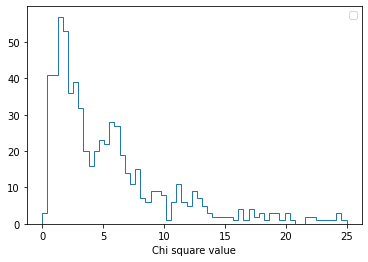

In [110]:
# just to double check

import matplotlib.pyplot as plt
plt.figure()
plt.hist(np.array(chi_sq_arr), bins = np.linspace(0,25,60),histtype = 'step')
#plt.vlines([8], ymin = 0, ymax = 50, ls = 'dashed', label = 'Threshold (chi square = 8)')
plt.xlabel('Chi square value')
plt.legend()